# HOW TO CREATE A PROJECT from scratch

+ this notebook is a template to generate Backend-required files to view a project with the DataDiVR (preview or VR)
+ STEP 1 and the "create a graph" section contains a template graph writing a required format (json) to then use the generate-project functions of the DataDiVR backend

+ STEP 2 to actually generate BACKEND project files.

In [2]:
import networkx as nx
import json 
import os

# these are the two functions one needs to create a JSON file to upload and create the project in the backend 
import nx2json as nx2j 
import uploaderGraph as uG


## How this is meant to be used:
+ Create an nx.Graph Object 

+ set attributes in the nx.Graph (optional, all can be empty) e.g. node positions ("pos") and colors ("nodecolor") and link colors ("linkcolor")

+ use the "create_project" function (down below to generate your project for the platform)

# CREATE A NX.GRAPH OBJECT per layout

### nx.Graph

In [4]:
# make circular ladder graph (e.g. example graph=)
G = nx.circular_ladder_graph(10000)
print("Number of nodes: ", len(G.nodes()))
print("Number of Links: ", len(G.edges()))

# ===============================================
# GRAPH NAME AND DESCRIPTION - a string each
# ===============================================

G.graph['projectname'] = "Circlegraph_XL"
G.graph['info'] = "A toy graph for testing purposes. Number of nodes: "+str(len(G.nodes()))+", Links: "+ str(len(G.edges()))+"."

Number of nodes:  20000
Number of Links:  30000


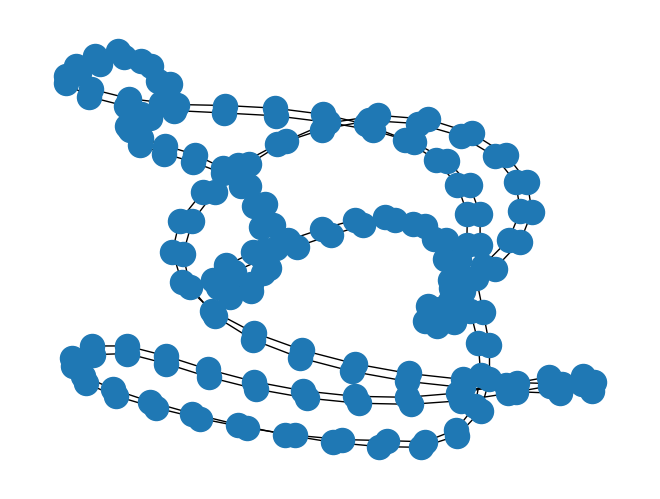

In [21]:
nx.draw(G)

### create node anntotations

In [5]:
import random 
def generate_random_words(num):
    words = ["alpha", "beta", "gamma", "delta", "epsilon", "zeta", "theta", "lambda", "mu", "nu"]
    return random.sample(words, num)

# Create a list to hold annotations in JSON format
l_annotations_json = []

# Process each node in the graph
for g in G.nodes():
    # Generate random annotations
    annotations = {
        "annot1": generate_random_words(random.randint(3, 4)),
        "annot2": generate_random_words(random.randint(1, 2)),
        "annot3": generate_random_words(random.randint(2, 3))
    }
    
    l_annotations_json.append(annotations)

# Create a dictionary mapping nodes to their annotations
d_annotations = dict(zip(G.nodes(), l_annotations_json))

# Set the node attributes in the graph
nx.set_node_attributes(G, d_annotations, name="annotation")


### create node positions and set as "pos" Graph attribute 
here are 3 different layouts, which all are stored in unique nx.Graph-objects (G_rgba, G_hex, ....)

In [8]:
# First layout (i.e. Graph 1)
G_rgba = G.copy()
G_rgba.graph["layoutname"] ='layout1-spring'
posG3D_1_pre = nx.spring_layout(G, dim=3, k=0.1, iterations=10)
posG3D_1 = {key: value.tolist() for key, value in posG3D_1_pre.items()}
nx.set_node_attributes(G_rgba, posG3D_1, name="pos")


In [9]:

# Second layout (i.e. Graph 2)
G_hex = G.copy()
G_hex.graph["layoutname"] = 'layout2-spring'
nx.set_node_attributes(G_hex, posG3D_1, name="pos")


# Third layout (i.e. Graph 3)
G_hex8 = G.copy()
G_hex8.graph["layoutname"] = 'layout3-spring'
nx.set_node_attributes(G_hex8, posG3D_1, name="pos")


# Fourth layout (i.e. Graph 4) - with clusters
G_clusters = G.copy()
G_clusters.graph["layoutname"] = 'layout4-clusters'
clustername_1 = 'cluster group 1'
clustername_2 = 'cluster group 2'
clustername_3 = 'cluster group 3'

# nodes into groups
for g in G_clusters.nodes():
    if g < len(G_clusters.nodes()) / 3:
        G_clusters.nodes[g]['cluster'] = clustername_1
    elif g < 2 * len(G_clusters.nodes()) / 3:
        G_clusters.nodes[g]['cluster'] = clustername_2
    else:
        G_clusters.nodes[g]['cluster'] = clustername_3

nx.set_node_attributes(G_clusters, posG3D_1, name="pos")

#### node and link colors 

In [10]:
# 3 Formats of colors values are supported: hex, rgba, hex8

# FIRST GRAPH - rgba color values
d_nodecolors_rgba = dict(zip(G_rgba.nodes(),[(255,35,0,120)]*len(G_rgba.nodes())))
nx.set_node_attributes(G_rgba, d_nodecolors_rgba, name="nodecolor")
l_linkcolors_rgba = (0,255,0,100)
nx.set_edge_attributes(G_rgba, l_linkcolors_rgba, name="linkcolor")


# SECOND GRAPH - hex color values 
d_nodecolors_hex = dict(zip(G_hex.nodes(),['#FF2300']*len(G_hex.nodes())))
nx.set_node_attributes(G_hex, d_nodecolors_hex, name="nodecolor")
l_linkcolors_hex = '#ff0000'
nx.set_edge_attributes(G_hex, l_linkcolors_hex, name="linkcolor")


# THIRD GRAPH - hex8 color values
d_nodecolors_hex8 = dict(zip(G_hex8.nodes(),['#0000ff60']*len(G_hex8.nodes())))
nx.set_node_attributes(G_hex8, d_nodecolors_hex8, name="nodecolor")
l_linkcolors_hex8 = '#0080ff30'
nx.set_edge_attributes(G_hex8, l_linkcolors_hex8, name="linkcolor")


# FOURTH GRAPH - clusters assigned 

# node colors 
d_nodecolors_clusters = {}
nodes_group1 = []
nodes_group2 = []
nodes_group3 = []
for n in G_clusters.nodes(): 
    if G_clusters.nodes[n]['cluster'] == clustername_1:
        d_nodecolors_clusters[n] = '#0000ff'
        nodes_group1.append(n)
    elif G_clusters.nodes[n]['cluster'] == clustername_2:
        d_nodecolors_clusters[n] = '#00ff00'
        nodes_group2.append(n)
    elif G_clusters.nodes[n]['cluster'] == clustername_3:
        d_nodecolors_clusters[n] = '#ff0000'
        nodes_group3.append(n)

# link colors
d_linkcolors_clusters = {}
for edge in G_clusters.edges():
    if edge[0] in nodes_group1 and edge[1] in nodes_group1:
        d_linkcolors_clusters[edge] = '#0000ff'
       
    elif edge[0] in nodes_group2 and edge[1] in nodes_group2:
        d_linkcolors_clusters[edge] = '#00ff00'
       
    elif edge[0] in nodes_group3 and edge[1] in nodes_group3:
        d_linkcolors_clusters[edge] = '#ff0000'
       
    else:
        d_linkcolors_clusters[edge] = (0,0,0,0)

l_linkcolors_clusters = list(d_linkcolors_clusters.values())

nx.set_node_attributes(G_clusters, d_nodecolors_clusters, name="nodecolor")
nx.set_edge_attributes(G_clusters, {edge: color for edge, color in zip(G_clusters.edges(), l_linkcolors_clusters)}, "linkcolor")


In [11]:
# dropping random links in a graph 
num_links_to_drop = int(len(list(G_rgba.edges()))*0.95) # delete 90% of links in vis
links_to_drop = random.sample(list(G_rgba.edges()), num_links_to_drop)
G_rgba.remove_edges_from(links_to_drop)
print("Number of links after dropping: ", len(G_rgba.edges()))


num_links_to_drop = int(len(list(G_hex.edges()))*0.7) # delete 70% of links in vis
links_to_drop = random.sample(list(G_hex.edges()), num_links_to_drop)
G_hex.remove_edges_from(links_to_drop)
print("Number of links after dropping: ", len(G_hex.edges()))


num_links_to_drop = int(len(list(G_clusters.edges()))*0.5) # delete 50% of links in vis
links_to_drop = random.sample(list(G_clusters.edges()), num_links_to_drop)
G_clusters.remove_edges_from(links_to_drop)
print("Number of links after dropping: ", len(G_clusters.edges()))

Number of links after dropping:  1500
Number of links after dropping:  9000
Number of links after dropping:  15000


### merge Graph files into one and store as a json file

In [12]:
Graphs = [G_rgba, G_hex, G_hex8, G_clusters]
Graphs

# CREATE A PROJECT WITH Nx.Graph object(s)

In [13]:
nx2j.create_project(Graphs)

Creating Project...
Successfully created the directory static/projects/Circlegraph_XL 
Project created successfully.


# BACKGROUND INFO: 
Find the graph structure generated in this notebook based on nx.Graph input below. 

In [28]:
'''

{
----------------------------------------
THIS IS THE GENERAL GRAPH INFO SECTION
----------------------------------------
  "directed": false,
  "multigraph": false,
  "projectname": "Testgraph",
  "info": "A toy graph for testing purposes. Number of nodes: 10, Links: 43.",
  "graphlayouts": [
      "layout1-spring",
      "layout2-spring",
      "layout3-spring",
      "layout4-clusters"
  ],
  "annotationTypes": true,
  "nodes": [
   ----------------------------------------
   contains all nodes of the project
   ----------------------------------------
      {
          "id": 0,
          "name": 0,
          "annotation": 
                {
                    "annot1": [
                        "lambda",
                        "alpha",
                        "zeta",
                        "theta"
                    ],
                    "annot2": [
                        "delta",
                        "nu"
                    ],
                    "annot3": [
                        "mu",
                        "gamma"
                    ]
          }
      },....
  ],
  "links": [
   ----------------------------------------
   contains all links of the project
   ----------------------------------------
      {
          "id": 0,
          "source": 0,
          "target": 1
      },
      {
          "id": 1,
          "source": 0,
          "target": 2
      },...
       ],
  "layouts": [
   ----------------------------------------
   contains all layouts of the project
   only contains nodes and links as well as colors specific to the layout
   ----------------------------------------
       {  "layoutname" : "name of first layout",
          "nodes": [
              {
                  "nodecolor": [
                      255,
                      35,
                      0,
                      120
                  ],
                  "pos": [
                      -0.5618057865250979,
                      0.1467411221839164,
                      0.49656801102094605
                  ],
                  "id": 0
               },...
        	],
          "links": [
              {
                  "linkcolor": [
                      0,
                      255,
                      0,
                      100
                  ],
                  "source": 0,
                  "target": 1
              },...
         	],
   	  }, {
          "layoutname" : "name of second layout",
          "nodes": [
              {
                  "nodecolor": "#0000ffaa",
                  "pos": [
                      -0.35948900932978317,
                      0.6255258442839948,
                      -0.04209289102217994
                  ],
                  "cluster": "cluster group 1",
                  "id": 0
               },... 
],
          "links": [
              {
                  "linkcolor": "#0000ff",
                  "source": 0,
                  "target": 1
              },
],
  	   }, { . . .  
 	},
}

'''

'\n\n{\n----------------------------------------\nTHIS IS THE GENERAL GRAPH INFO SECTION\n----------------------------------------\n  "directed": false,\n  "multigraph": false,\n  "projectname": "Testgraph",\n  "info": "A toy graph for testing purposes. Number of nodes: 10, Links: 43.",\n  "graphlayouts": [\n      "layout1-spring",\n      "layout2-spring",\n      "layout3-spring",\n      "layout4-clusters"\n  ],\n  "annotationTypes": true,\n  "nodes": [\n   ----------------------------------------\n   contains all nodes of the project\n   ----------------------------------------\n      {\n          "id": 0,\n          "name": 0,\n          "annotation": \n                {\n                    "annot1": [\n                        "lambda",\n                        "alpha",\n                        "zeta",\n                        "theta"\n                    ],\n                    "annot2": [\n                        "delta",\n                        "nu"\n                    ],\n    

## CREATE A JSON FILE WITH THE ABOVE STRUCTURE to then create a project

In [12]:
import networkx as nx
import json 
import os

# these are the two functions one needs to create a JSON file to upload and then create the project in the backend 
import nx2json as nx2j 
import uploaderGraph as uG

In [15]:
# ----------------------------------------
# CREATE Json file
# ----------------------------------------
merged_graphs = nx2j.make_json(Graphs)
path = "temp_files/"

# save the merged graph in a json file
with open(path+Graphs[0].graph['projectname']+'.json', 'w') as fp:
    json.dump(merged_graphs, fp, indent=4)

In [ ]:
# ----------------------------------------
# READ Json file
# ----------------------------------------
filename = 'myfile.json'
currentwd = '.../DataDiVR_Webapp/temp_files/' # modify file location here
path = os.path.join(currentwd, filename)

# open the json file
with open(path, 'r') as f:
     G_merged = json.load(f)

In [ ]:
## ----------------------------------------
# CREATE A PROJECT for the VR Platform 
# ----------------------------------------
#the actual "upload step" to create a project with the required VR platform files 

uG.upload_filesJSON(G_merged)